<a href="https://colab.research.google.com/github/HIsu1231/AI_INOVATION_SQUARE/blob/master/NN1_BackPropagation_MNIST_Validation0_2(index_label_prediction_list).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [11]:
class DataGeneration():

  def __init__(self, file_path, seperation_rate, target_position):

    self.file_path = file_path

    self.seperation_rate = seperation_rate

    if (target_position == -1 or target_position == 0):
      self.target_position = target_position
    else:
      err_str = 'target position must be -1 or 0'
      raise Exception(err_str)

  def __display_target_distribution(self, data, str_of_kind):

    target_data = data[:, self.target_position]

    unique, counts = np.unique(target_data, return_counts = True)

    unique_target = []

    print("==============================================================================================")
    for i in range(len(unique)):
        print("[DataGeneration] unique number of" + str_of_kind + " = ", unique[i], ", count = ", counts[i])
        unique_target.append(unique[i])
    
    for i in range(len(unique_target)):
        print("[DataGeneration] unique number of" + str_of_kind + " = ", unique_target[i], ", ratio = ", np.round(100 * counts[i] / len(target_data),2), '%')
    print("==============================================================================================")

  def generate(self):

    try:
      loaded_data = np.loadtxt(self.file_path, delimiter=',', dtype=np.float32)
    
    except Exception as err:
      print('[DataGeneration::generate()] ', str(err))
      raise Exception(str(err))

    self.__display_target_distribution(loaded_data, 'original_data')

    total_data_num = len(loaded_data)
    validation_data_num = int(len(loaded_data) * self.seperation_rate)

    np.random.shuffle(loaded_data)

    validation_data = loaded_data[0:validation_data_num]
    training_data = loaded_data[validation_data_num: ]

    self.__display_target_distribution(training_data, 'training_data')
    self.__display_target_distribution(validation_data, 'validation_data')

    return training_data, validation_data

In [20]:
class NeuralNetwork():

  def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):

    self.W2 = np.random.randn(input_nodes, hidden_nodes) / np.sqrt(input_nodes / 2)
    self.b2 = np.random.rand(hidden_nodes)

    self.W3 = np.random.randn(hidden_nodes, output_nodes) / np.sqrt(hidden_nodes / 2)
    self.b3 = np.random.rand(output_nodes)

    self.learning_rate = learning_rate

  def feed_forward(self):

    delta = 1e-7

    self.z1 = self.input_data
    self.a1 = self.input_data

    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = sigmoid(self.z2)

    self.z3 = np.dot(self.a2, self.W3) + self.b3
    self.a3 = sigmoid(self.z3)

    return -np.sum(self.target_data * np.log(self.a3 + delta) + (1 - self.target_data) * np.log((1 - self.a3) + delta))

  def loss_val(self):

    delta = 1e-7

    self.z1 = self.input_data
    self.a1 = self.input_data

    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = sigmoid(self.z2)

    self.z3 = np.dot(self.a2, self.W3) + self.b3
    self.a3 = sigmoid(self.z3)

    return -np.sum(self.target_data * np.log(self.a3 + delta) + (1 - self.target_data) * np.log((1 - self.a3) + delta))

  def accuracy(self, test_input_data, test_target_data):

    matched_list = []

    temp_list = []
    index_label_prediction_list = []

    for i in range(len(test_input_data)):

      label = int(test_target_data[i])

      data = test_input_data[i] / 255.0 * 0.99 + 0.01
      predicted_num = self.predict(np.array(data,ndmin=2))

      if label == predicted_num:
        matched_list.append(i)
      
      else:
        temp_list.append(i)
        temp_list.append(label)
        temp_list.append(predicted_num)

        index_label_prediction_list.append(temp_list)

        temp_list = []
    
    accuracy_val = len(matched_list) / len(test_input_data)

    return accuracy_val, index_label_prediction_list
    
  def train(self, input_data, target_data):

    self.input_data = input_data
    self.target_data = target_data

    loss_val = self.feed_forward()

    loss_3 = (self.a3 - self.target_data) * self.a3 * (1 - self.a3)
    loss_2 = np.dot(loss_3,self.W3.T) * self.a2 * (1 - self.a2)

    self.W3 = self.W3 - self.learning_rate * np.dot(self.a2.T,loss_3)
    self.b3 = self.b3 - self.learning_rate * loss_3

    self.W2 = self.W2 - self.learning_rate * np.dot(self.a1.T,loss_2)
    self.b2 = self.b2 - self.learning_rate * loss_2

  def predict(self, input_data):

    z2 = np.dot(input_data, self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2, self.W3) + self.b3
    a3 = sigmoid(z3)

    predicted_num = np.argmax(a3)

    return predicted_num


In [13]:
file_path = './drive/MyDrive/AI_INOVATION_SQUARE/data/mnist_train.csv'
seperation_rate = 0.2
target_position = 0

data_obj = DataGeneration(file_path, seperation_rate, target_position)

(training_data, validation_data) = data_obj.generate()

print("training_data.shape = ", training_data.shape)
print("validation_data.shape = ", validation_data.shape)

[DataGeneration] unique number oforiginal_data =  0.0 , count =  5923
[DataGeneration] unique number oforiginal_data =  1.0 , count =  6742
[DataGeneration] unique number oforiginal_data =  2.0 , count =  5958
[DataGeneration] unique number oforiginal_data =  3.0 , count =  6131
[DataGeneration] unique number oforiginal_data =  4.0 , count =  5842
[DataGeneration] unique number oforiginal_data =  5.0 , count =  5421
[DataGeneration] unique number oforiginal_data =  6.0 , count =  5918
[DataGeneration] unique number oforiginal_data =  7.0 , count =  6265
[DataGeneration] unique number oforiginal_data =  8.0 , count =  5851
[DataGeneration] unique number oforiginal_data =  9.0 , count =  5949
[DataGeneration] unique number oforiginal_data =  0.0 , ratio =  9.87 %
[DataGeneration] unique number oforiginal_data =  1.0 , ratio =  11.24 %
[DataGeneration] unique number oforiginal_data =  2.0 , ratio =  9.93 %
[DataGeneration] unique number oforiginal_data =  3.0 , ratio =  10.22 %
[DataGener

In [22]:
#hyper_paramter

i_nodes = training_data.shape[1] - 1
h_nodes = 100
o_nodes = 10
epochs = 20
lr = 0.1

loss_val_list = []

training_accuracy_list = []
validation_accuracy_list = []

index_label_prediction_list = []

nn = NeuralNetwork(i_nodes, h_nodes, o_nodes, lr)

start_time = datetime.now()

for i in range(epochs):
    for step in range(len(training_data)):

      input_data = (training_data[step,1: ] / 255.0 * 0.99) + 0.01

      target_data = np.zeros(o_nodes) + 0.01
      target_data[int(training_data[step,0])] = 0.99

      nn.train(np.array(input_data,ndmin=2), np.array(target_data,ndmin=2))

      if step % 1000 == 0:
        print("epochs = ", i, ", step = ", step, ", loss value = ", nn.loss_val())

      #손실값 저장 per step
      loss_val_list.append(nn.loss_val())
    
    #정확도 계산 및 저장 per epochs
    (training_accuracy, index_label_prediction_list) = nn.accuracy(training_data[:,1: ], training_data[:,0])
    (validation_accuracy, index_label_prediction_list) = nn.accuracy(validation_data[:, 1:], validation_data[:,0])

    print("\n current epochs = ", i, ", current training accuracy = ", 100 * np.round(training_accuracy,3),'%')
    print("current epochs = ", i, ", current validation accuracy = ", 100 * np.round(validation_accuracy,3),'%\n')

    training_accuracy_list.append(training_accuracy)
    validation_accuracy_list.append(validation_accuracy)

end_time = datetime.now()
print("\nElpased time = ", end_time - start_time)

epochs =  0 , step =  0 , loss value =  7.174138623568299
epochs =  0 , step =  1000 , loss value =  1.1530475054206706
epochs =  0 , step =  2000 , loss value =  1.0848477968533699
epochs =  0 , step =  3000 , loss value =  0.7532519528281487
epochs =  0 , step =  4000 , loss value =  1.1324910803704846
epochs =  0 , step =  5000 , loss value =  0.7252920882387033
epochs =  0 , step =  6000 , loss value =  1.0959139730149021
epochs =  0 , step =  7000 , loss value =  2.0120165761046365
epochs =  0 , step =  8000 , loss value =  1.1815897777811106
epochs =  0 , step =  9000 , loss value =  0.7212795712508419
epochs =  0 , step =  10000 , loss value =  0.7225978431414907
epochs =  0 , step =  11000 , loss value =  0.6810338543876435
epochs =  0 , step =  12000 , loss value =  0.8961787329947548
epochs =  0 , step =  13000 , loss value =  0.8536602113810733
epochs =  0 , step =  14000 , loss value =  1.0067040862209644
epochs =  0 , step =  15000 , loss value =  1.1577167834498896
epochs

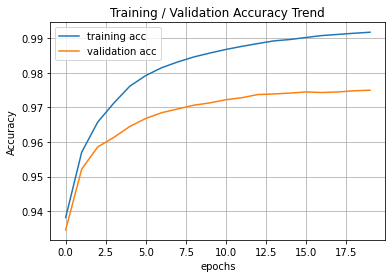

In [26]:
plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(training_accuracy_list)
plt.plot(validation_accuracy_list)
plt.legend(['training acc', 'validation acc'])

plt.show()

In [25]:
test_data = np.loadtxt('./drive/MyDrive/AI_INOVATION_SQUARE/data/mnist_test.csv', delimiter=',', dtype=np.float32)

print("test_data.shape = ",test_data.shape)

test_data.shape =  (10000, 785)


In [28]:
test_input_data = test_data[:, 1:]
test_target_data = test_data[:,0]

(test_accuracy, index_label_prediction_list) = nn.accuracy(test_input_data, test_target_data)

print("Accuracy = ", 100* np.round(test_accuracy,3),'%')

Accuracy =  97.6 %


In [42]:
total_test_data_num = len(test_data)
# 총 오답 개수
false_prediction_data_num = len(index_label_prediction_list)

print("false prediction data num = ", false_prediction_data_num)

# index_label_prediction_list 확인
print(index_label_prediction_list)

false prediction data num =  237
[[8, 5, 6], [96, 1, 9], [247, 4, 2], [259, 6, 0], [321, 2, 7], [340, 5, 3], [445, 6, 0], [448, 9, 8], [449, 3, 5], [495, 8, 2], [582, 8, 2], [619, 1, 8], [659, 2, 8], [674, 5, 3], [691, 8, 4], [707, 4, 9], [717, 0, 6], [720, 5, 8], [740, 4, 9], [810, 7, 2], [882, 9, 7], [938, 3, 5], [965, 6, 0], [1014, 6, 5], [1039, 7, 8], [1044, 6, 2], [1107, 9, 3], [1112, 4, 6], [1156, 7, 8], [1182, 6, 8], [1192, 9, 4], [1226, 7, 2], [1232, 9, 4], [1242, 4, 9], [1247, 9, 3], [1260, 7, 1], [1283, 7, 2], [1289, 5, 9], [1299, 5, 7], [1319, 8, 3], [1326, 7, 1], [1378, 5, 6], [1414, 9, 7], [1425, 8, 4], [1494, 7, 0], [1500, 7, 1], [1522, 7, 9], [1527, 1, 3], [1549, 4, 2], [1553, 9, 8], [1609, 2, 6], [1681, 3, 7], [1709, 9, 3], [1754, 7, 2], [1790, 2, 8], [1828, 3, 7], [1878, 8, 3], [1901, 9, 4], [1940, 5, 0], [1941, 7, 5], [1952, 9, 3], [2004, 8, 9], [2016, 7, 2], [2018, 1, 7], [2033, 0, 4], [2035, 5, 3], [2044, 2, 7], [2053, 4, 9], [2098, 2, 0], [2109, 3, 7], [2118, 6, 0]

### index_label_prediction_list 이미지 확인

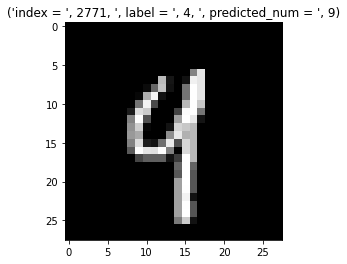

In [41]:
index = np.random.randint(0, len(index_label_prediction_list))

false_data_info = index_label_prediction_list[index]

mnist_index = false_data_info[0]
label = false_data_info[1]
predicted_num = false_data_info[2]

title_str = 'index = ', mnist_index, ", label = ", label, ", predicted_num = ", predicted_num

img = test_data[mnist_index,1: ].reshape(28,28)

plt.title(title_str)
plt.imshow(img, cmap='gray')
plt.show()